In [1]:
import janitor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
renda = pd.read_csv('analise_renda.csv', sep = ';', decimal = ',').clean_names()

In [9]:
renda.drop(['unnamed_9', 'unnamed_10'], axis = 1, inplace = True)

In [10]:
renda.head()

,sigla,codigo,municipio,mortalidade_infantil,pib,pop,analfabetismo,urbanizacao,pibpc
0,AC,1200013,Acrelândia,28.33,75641.45432,7935,26.691,0.441840,9.532634
1,AC,1200054,Assis Brasil,27.61,28164.54802,3490,29.046,0.616332,8.070071
2,AC,1200104,Brasiléia,30.71,90503.06502,17013,24.507,0.530535,5.319642
3,AC,1200138,Bujari,28.33,54942.54956,5826,38.770,0.279437,9.430578
4,AC,1200179,Capixaba,41.58,42746.16287,5206,37.717,0.292163,8.210942


In [11]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 9 columns):
sigla                   5507 non-null object
codigo                  5507 non-null int64
municipio               5507 non-null object
mortalidade_infantil    5507 non-null float64
pib                     5507 non-null float64
pop                     5507 non-null int64
analfabetismo           5507 non-null float64
urbanizacao             5507 non-null float64
pibpc                   5507 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 387.3+ KB


In [12]:
renda.isnull().count()

sigla                   5507
codigo                  5507
municipio               5507
mortalidade_infantil    5507
pib                     5507
pop                     5507
analfabetismo           5507
urbanizacao             5507
pibpc                   5507
dtype: int64

In [13]:
renda.describe()

,codigo,mortalidade_infantil,pib,pop,analfabetismo,urbanizacao,pibpc
count,5.507000e+03,5507.000000,5.507000e+03,5.507000e+03,5507.000000,5507.000000,5507.000000
mean,3.241650e+06,34.083278,2.844054e+05,3.083333e+04,21.769940,0.588254,5.908315
std,9.797763e+05,18.470639,3.031392e+06,1.867506e+05,12.460216,0.233343,7.593640
min,1.100015e+06,5.380000,2.565788e+03,7.950000e+02,0.907000,0.000000,0.800794
25%,2.511252e+06,18.640000,1.870173e+04,5.152500e+03,11.660500,0.404586,2.321789
50%,3.144672e+06,29.510000,3.872491e+04,1.041800e+04,17.962000,0.593342,4.353052
75%,4.116554e+06,46.150000,9.995169e+04,2.135650e+04,32.068500,0.779470,6.868144
max,5.300108e+06,109.670000,1.847801e+08,1.043425e+07,60.661000,1.000000,157.993692


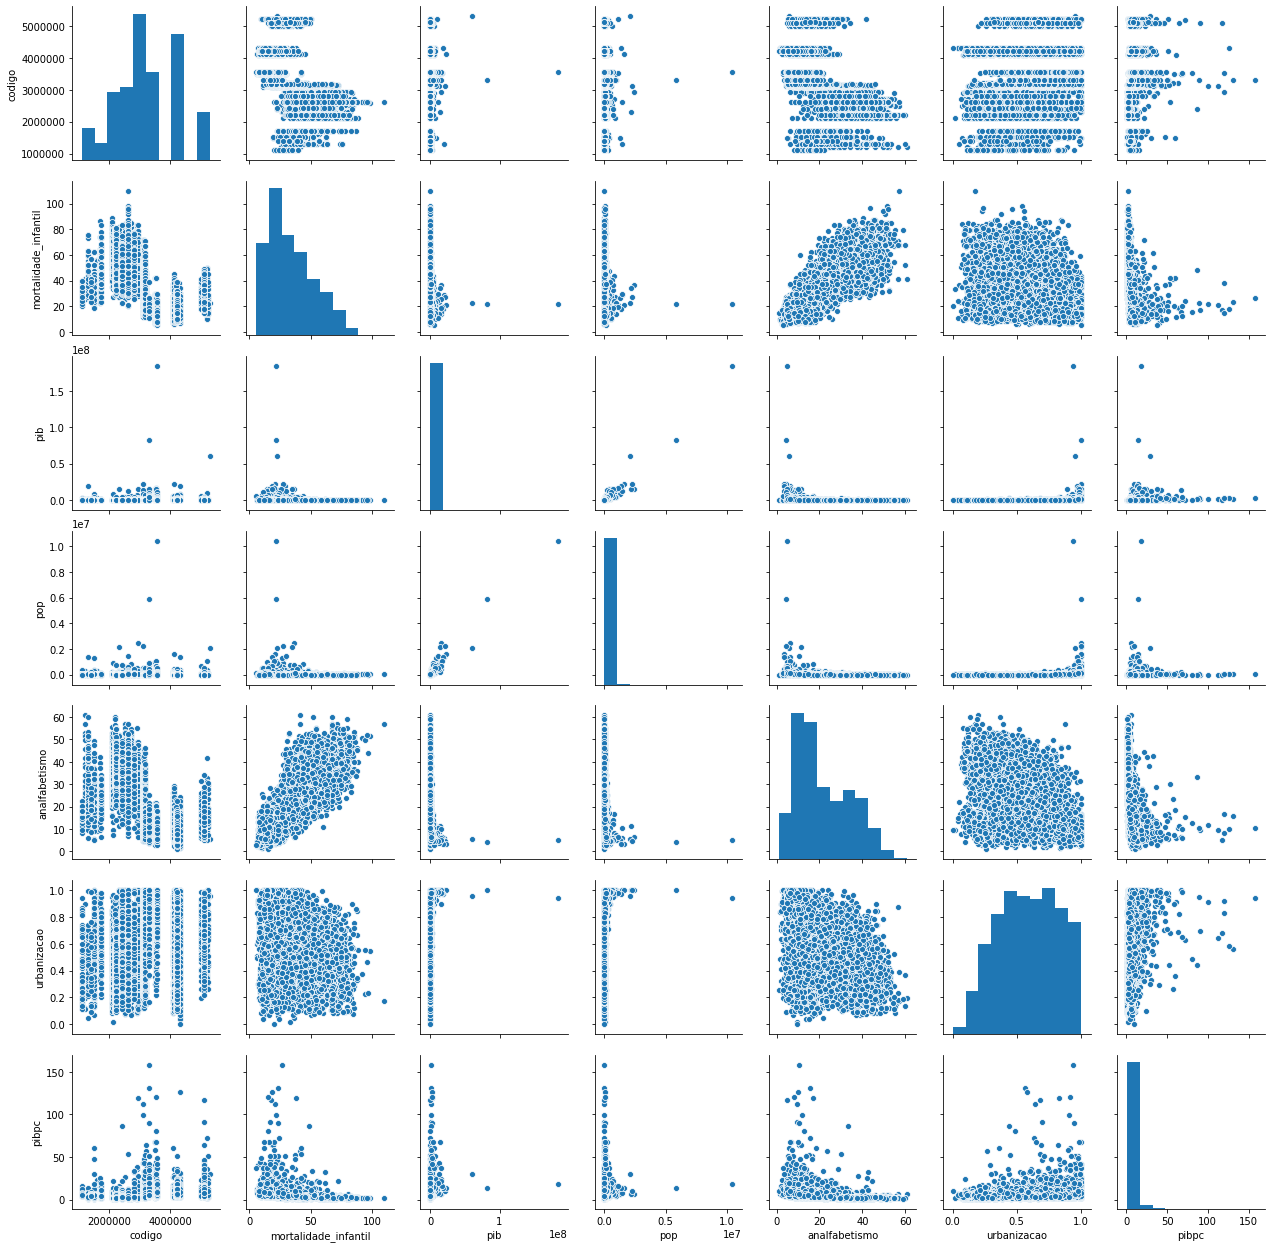

In [14]:
sns.pairplot(renda)

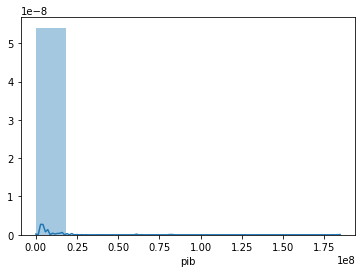

In [15]:
sns.distplot(renda['pib'], bins = 10)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
renda.columns

Index(['sigla', 'codigo', 'municipio', 'mortalidade_infantil', 'pib', 'pop',
       'analfabetismo', 'urbanizacao', 'pibpc'],
      dtype='object')

In [18]:
X = renda[['codigo', 'mortalidade_infantil', 'pop',
       'analfabetismo', 'urbanizacao']]
y = renda['pib']

In [19]:
X.shape, y.shape

((5507, 5), (5507,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
lm.score(X_train, y_train) #score = r²

0.8792929466260292

In [24]:
lm.coef_

array([ 4.36127065e-02, -2.54350809e+03,  1.24721363e+01,  5.90778108e+02,
       -1.64430182e+05])

In [74]:
pd.DataFrame(lm.coef_, index = X.columns, columns = ['Coeficiente'])

,Coeficiente
codigo,0.043613
mortalidade_infantil,-2543.508091
pop,12.472136
analfabetismo,590.778108
urbanizacao,-164430.181915


In [25]:
y_pred = lm.predict(X_test)

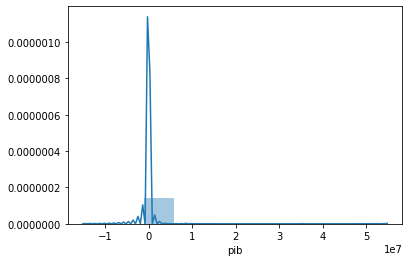

In [28]:
sns.distplot(y_test - y_pred, bins = 50)

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred).round(2)))

MAE: 217712.84
MSE: 2930870755380.2
RMSE: 1711978.6083301976


Text(0, 0.5, 'Observed prices')

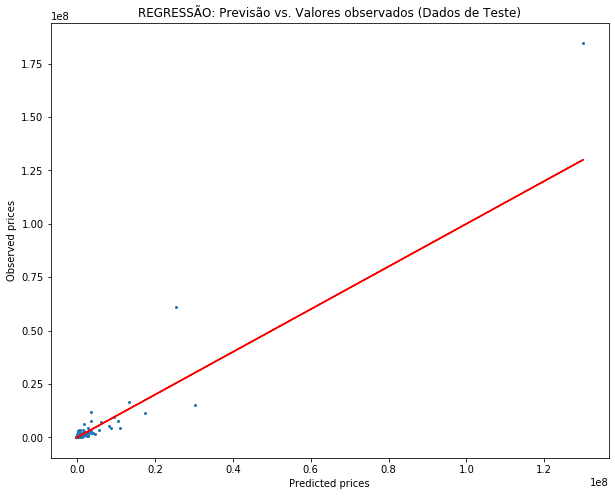

In [30]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(y_pred, y_test,s=4)
ax.plot(y_pred,y_pred,color='red')
ax.set_title("REGRESSÃO: Previsão vs. Valores observados (Dados de Teste)")
ax.set_xlabel('Predicted prices')
ax.set_ylabel("Observed prices")

In [32]:
df = pd.DataFrame()

In [33]:
df['y_test'] = y_test
df['y_pred'] = y_pred

In [34]:
df

,y_test,y_pred
1433,431966.81490,184874.882909
1200,22732.27893,-66417.176817
4501,26669.95502,75231.561069
4552,15055.41034,65700.959821
1867,10624.20241,-89232.882411
...,...,...
4771,77566.94865,60597.100731
1769,73920.44435,107592.324882
2195,47217.51950,37694.850869
1288,13668.41093,-104495.338730


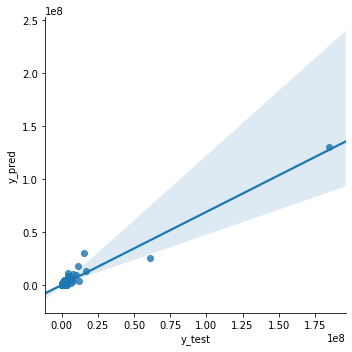

In [35]:
sns.lmplot('y_test', 'y_pred', data = df)